<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for Lecture 2

**What are the dimensions?**

What are the dimensions and shape of this tensor?

In [1]:
import numpy as np # importing numpy library
x = np.array([[[0 , 1, 2, 3, 4], 
              [5, 6, 7, 8, 9],
              [10, 11, 12, 13, 14]],
              [[15, 16, 17, 18, 19],
              [20, 21, 22, 23, 24],
              [25, 26, 27, 28, 29]]]) # creating a 3D array, which is a list of two 2D arrays 

In [2]:
# computing the number of axes (dimensions) of the array
x.ndim 
# the output is 3, which means that the array has 3 dimensions

3

In [3]:
# computing the shape of the array 
x.shape
# the output is (2, 3, 5), which means that the array has 2 elements in the first dimension, 3 elements in the second dimension, and 5 elements in the third dimension

(2, 3, 5)

# Manipulating tensors in NumPy

What's the next batch?

What's the shape and dtype?

In [4]:
# loading the data 
from tensorflow.keras.datasets import mnist # importing the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # loading the data into the variables train_images, train_labels, test_images, test_labels 

In [5]:
# slicing the first batch of 256 images from the training data
batch1 = train_images[:256]
# This is because the first axis is the samples axis, and the second and third axes are the height and width of the images 

# displaying the shape of the batch
batch1.ndim
# the output is 3, which means that the batch has 3 dimensions

3

In [6]:
# displaying the shape of the batch
batch1.shape
# the output is (256, 28, 28), which means that the batch has 256 images, each image has 28 pixels in height, and 28 pixels in width

(256, 28, 28)

In [7]:
# displaying the data type of the batch
batch1.dtype
# the output is uint8, which means that the data type of the batch is unsigned integer 8-bit

dtype('uint8')

# Tensor operations

Perform the operations below starting with the matrix multiplication shown in the animation below.

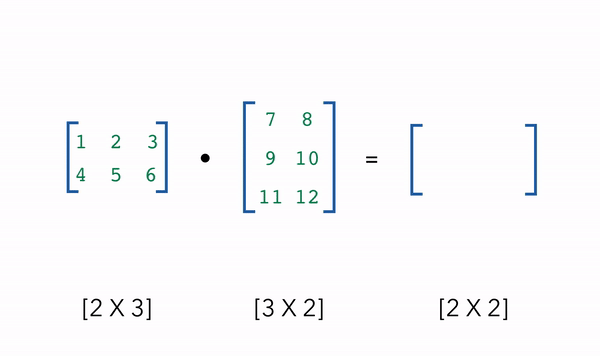

In [8]:
x = np.array([[1, 2, 3], 
              [4, 5, 6]]) # creating a 2D array

y = np.array([[7, 8],
              [9, 10],
              [11, 12]]) # creating a 2D array

In [9]:
# computing the dot product of the two arrays (multiplying the two arrays)
dot_product = np.dot(x, y)
dot_product # displaying the dot product
# the dot product of two matrices is a matrix multiplication operation that takes two matrices and produces another matrix

array([[ 58,  64],
       [139, 154]])

In [10]:
# reshaping the resulting matrix into shape (4,1)
reshaped_result = dot_product.reshape(4, 1) 
reshaped_result # displaying the reshaped result
# reshaping the matrix into a new shape (4,1) means that the matrix will have 4 rows and 1 column

array([[ 58],
       [ 64],
       [139],
       [154]])

In [11]:
# transposing the resulting vector
np.transpose(reshaped_result)
# transposing a matrix means flipping the matrix over its diagonal

array([[ 58,  64, 139, 154]])

#Experiment with Gradient Descent

Implement a simple gradient descent algorithm to find the minimum value of a quadratic function $f(x) = x^2 - 4x + 4$

The goal is to understand how different learning rates affect the convergence towards the function's minimum.

Your task: Manually implement the gradient descent algorithm and observe the convergence process for at least three different learning rates.

First, you need to define the function $f(x) = x^2 - 4x + 4$ and its derivative.

In [12]:
def f(x): # defining the function f(x) = x^2 - 4x + 4
    return x ** 2 - 4 * x + 4 

def df(x): # defining the derivative of the function f(x) = x^2 - 4x + 4
    return 2 * x - 4

Add the gradient descent update rule $x = x - \eta \cdot f'(x)$, where $x$ is the current position, $\eta$ is the learning rate and $f'(x)$ is the derivative of the function at $x$.

In [13]:
def gradient_descent(initial_x, learning_rate, epochs): # defining the gradient descent algorithm
    x = initial_x # setting the initial value of x
    history = []  # creating an empty list to store the history of x and f(x)
    for _ in range(epochs): # looping through the number of epochs
        gradient = df(x) # computing the gradient of f(x)
        x = x - learning_rate * gradient # updating the value of x
        history.append((x, f(x))) # appending the new value of x and f(x) to the history list
    return history # returning the history list

It's time to perform gradient descent for some learning rates. First, try the learning rates below. Then try higher learning rates. What happens at higher rates? Why?

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

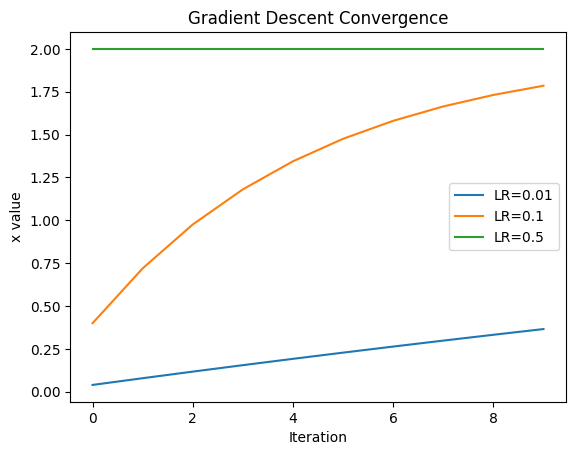

In [14]:
import matplotlib.pyplot as plt # importing the matplotlib library

learning_rates = [0.01, 0.1, 0.5] # creating a list of learning rates
# if the learning rates were higher, the algorithm would converge faster but might overshoot the minimum value of f(x) 
initial_x = 0 # setting the initial value of x
epochs = 10 # setting the number of epochs to 10 before the algorithm stops, which is the number of iterations the algorithm will run for 

for lr in learning_rates: # looping through the learning rates
    history = gradient_descent(initial_x, lr, epochs) # applying the gradient descent algorithm
    xs, ys = zip(*history) # unzipping the history list into x and y
    plt.plot(xs, label=f'LR={lr}') # plotting the x values

plt.xlabel('Iteration') # setting the x label
plt.ylabel('x value') # setting the y label
plt.title('Gradient Descent Convergence') # setting the title
plt.legend() # displaying the legend
plt.show() # displaying the plot

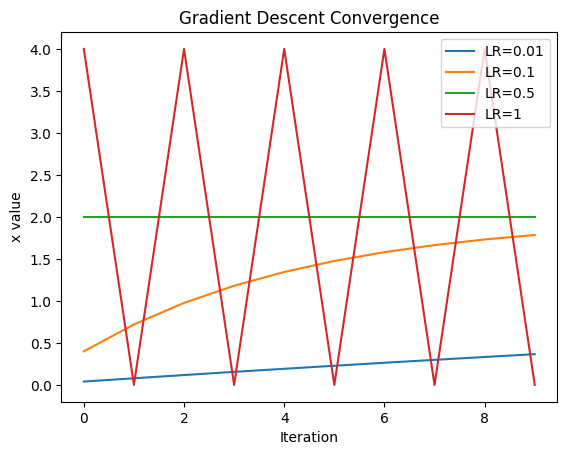

In [15]:
import matplotlib.pyplot as plt # importing the matplotlib library

learning_rates = [0.01, 0.1, 0.5, 1] # creating a list of learning rates
# if the learning rates were higher, the algorithm would converge faster but might overshoot the minimum value of f(x)
initial_x = 0 # setting the initial value of x
epochs = 10 # setting the number of epochs to 10 before the algorithm stops, which is the number of iterations the algorithm will run for

for lr in learning_rates: # looping through the learning rates
    history = gradient_descent(initial_x, lr, epochs) # applying the gradient descent algorithm
    xs, ys = zip(*history) # unzipping the history list into x and y
    plt.plot(xs, label=f'LR={lr}') # plotting the x values

plt.xlabel('Iteration') # setting the x label
plt.ylabel('x value') # setting the y label
plt.title('Gradient Descent Convergence') # setting the title
plt.legend() # displaying the legend
plt.show() # displaying the plot